In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/keshav081991/ML-Classification-Assignment2-streamlit-app/refs/heads/main/bank.csv"

df = pd.read_csv(url, sep=',')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
df.shape

(11162, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

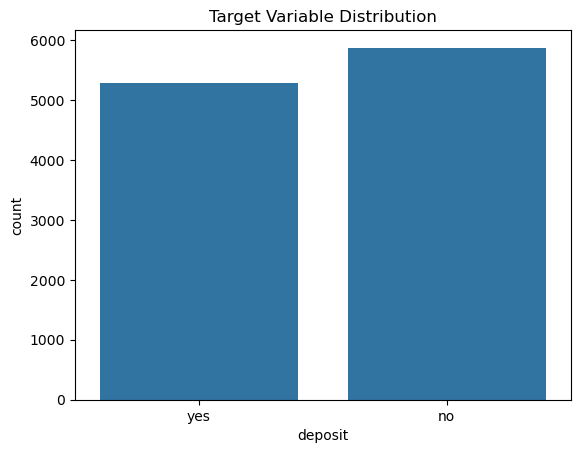

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df.deposit, data=df)
plt.title("Target Variable Distribution")
plt.show()

In [8]:
df['deposit'] = df['deposit'].map({'yes':1, 'no':0})

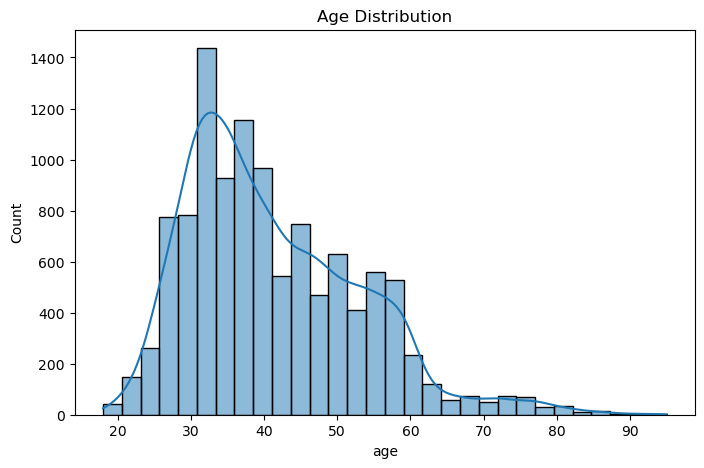

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

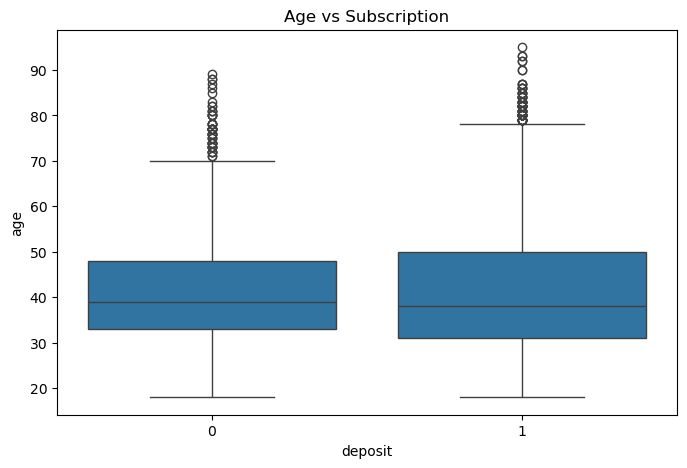

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='deposit', y='age', data=df)
plt.title("Age vs Subscription")
plt.show()

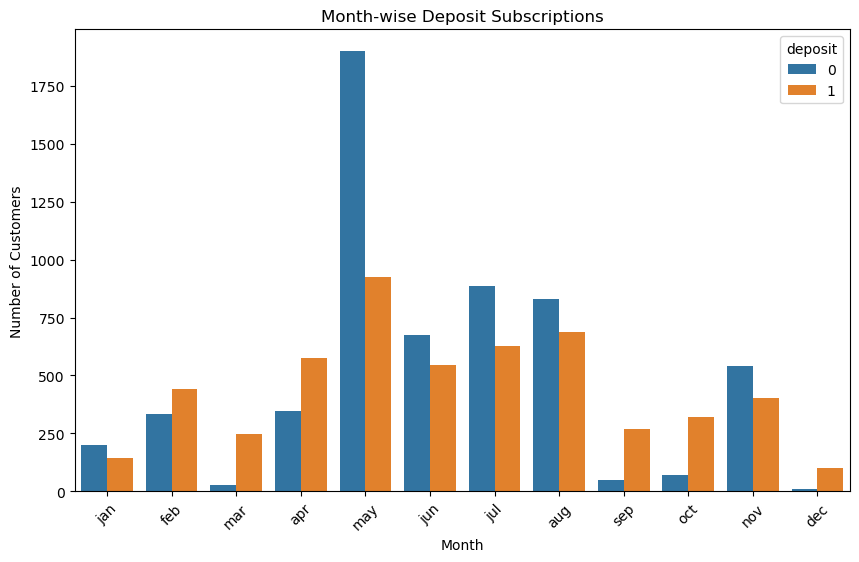

In [11]:
plt.figure(figsize=(10,6))

sns.countplot(x='month', hue='deposit', data=df,
              order=['jan','feb','mar','apr','may','jun',
                     'jul','aug','sep','oct','nov','dec'])

plt.title("Month-wise Deposit Subscriptions")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

plt.show()

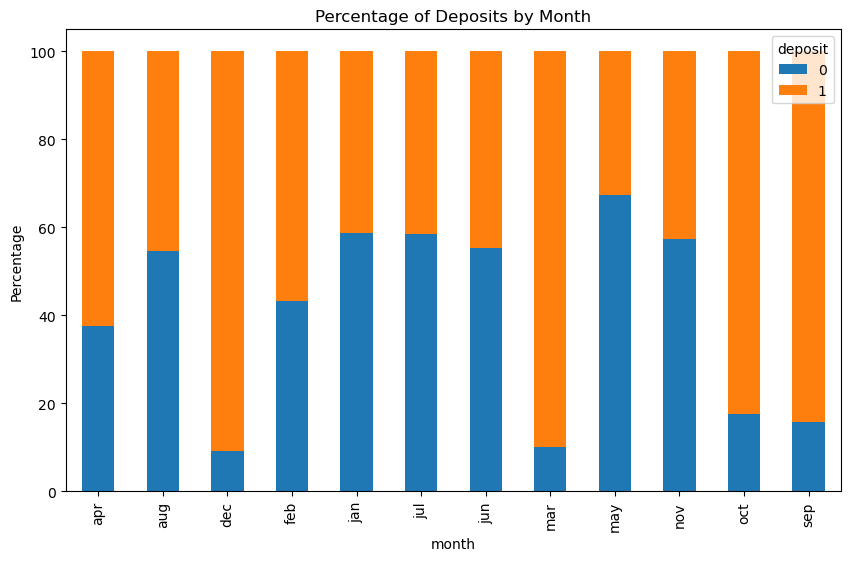

In [12]:
month_deposit = pd.crosstab(df['month'], df['deposit'], normalize='index') * 100
month_deposit.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Percentage of Deposits by Month")
plt.ylabel("Percentage")
plt.show()

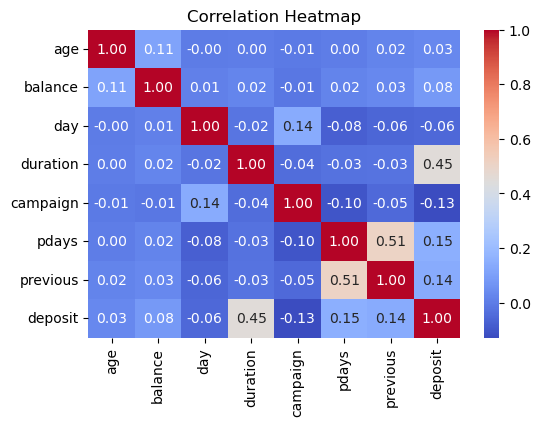

In [13]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), cmap='coolwarm',annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
import numpy as np

df['balance_log'] = np.log1p(df['balance'])
df['duration_log'] = np.log1p(df['duration'])

C:\Users\kesha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kesha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[18,30,45,60,100],
    labels=['young','adult','mid_age','senior']
)

In [16]:
df['contact_efficiency'] = df['duration'] / (df['campaign'] + 1)

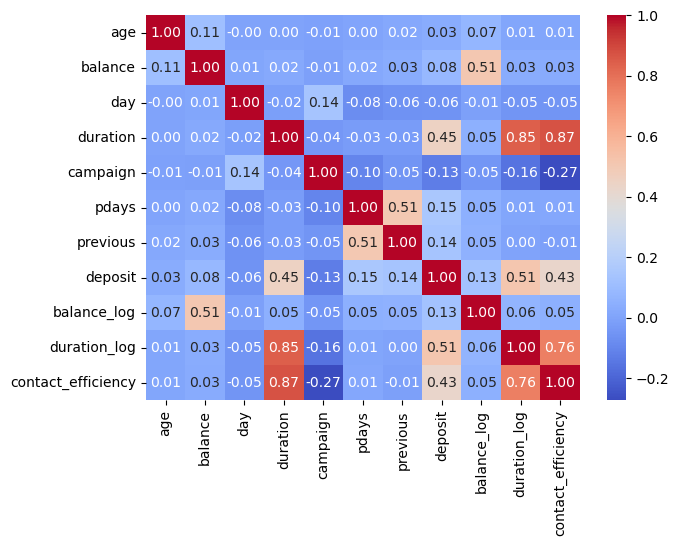

In [17]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(7,5))
sns.heatmap(numeric_df.corr(), cmap='coolwarm',annot=True, fmt=".2f")
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,balance_log,duration_log,age_group,contact_efficiency
0,59,0,1,1,0,2343,1,0,2,5,...,1042,1,-1,0,3,1,7.759614,6.949856,mid_age,521.000000
1,56,0,1,1,0,45,0,0,2,5,...,1467,1,-1,0,3,1,3.828641,7.291656,mid_age,733.500000
2,41,9,1,1,0,1270,1,0,2,5,...,1389,1,-1,0,3,1,7.147559,7.237059,adult,694.500000
3,55,7,1,1,0,2476,1,0,2,5,...,579,1,-1,0,3,1,7.814803,6.363028,mid_age,289.500000
4,54,0,1,2,0,184,0,0,2,5,...,673,2,-1,0,3,1,5.220356,6.513230,mid_age,224.333333


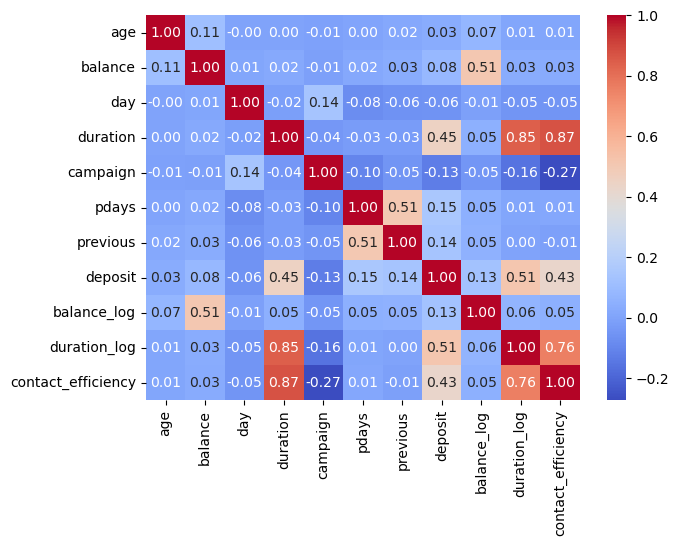

In [20]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(7,5))
sns.heatmap(numeric_df.corr(), cmap='coolwarm',annot=True, fmt=".2f")
plt.show()

In [21]:
df.shape

(11162, 21)

In [22]:
df.month.value_counts()

month
8     2824
1     1519
5     1514
6     1222
9      943
0      923
3      776
10     392
4      344
11     319
7      276
2      110
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 11162 non-null  int64  
 1   job                 11162 non-null  int32  
 2   marital             11162 non-null  int32  
 3   education           11162 non-null  int32  
 4   default             11162 non-null  int32  
 5   balance             11162 non-null  int64  
 6   housing             11162 non-null  int32  
 7   loan                11162 non-null  int32  
 8   contact             11162 non-null  int32  
 9   day                 11162 non-null  int64  
 10  month               11162 non-null  int32  
 11  duration            11162 non-null  int64  
 12  campaign            11162 non-null  int64  
 13  pdays               11162 non-null  int64  
 14  previous            11162 non-null  int64  
 15  poutcome            11162 non-null  int32  
 16  depo

In [25]:
df = df.drop(['age', 'balance', 'duration'], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job                 11162 non-null  int32  
 1   marital             11162 non-null  int32  
 2   education           11162 non-null  int32  
 3   default             11162 non-null  int32  
 4   housing             11162 non-null  int32  
 5   loan                11162 non-null  int32  
 6   contact             11162 non-null  int32  
 7   day                 11162 non-null  int64  
 8   month               11162 non-null  int32  
 9   campaign            11162 non-null  int64  
 10  pdays               11162 non-null  int64  
 11  previous            11162 non-null  int64  
 12  poutcome            11162 non-null  int32  
 13  deposit             11162 non-null  int64  
 14  balance_log         10483 non-null  float64
 15  duration_log        11162 non-null  float64
 16  age_

In [27]:
import numpy as np

np.isinf(df).sum()

job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
day                   0
month                 0
campaign              0
pdays                 0
previous              0
poutcome              0
deposit               0
balance_log           9
duration_log          0
age_group             0
contact_efficiency    0
dtype: int64

In [28]:
import numpy as np

df['balance_log'] = df['balance_log'].replace([np.inf, -np.inf], np.nan)

In [29]:
df['balance_log'] = df['balance_log'].fillna(
    df['balance_log'].median()
)

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:,1]

    results.append([
        name,
        accuracy_score(y_test, pred),
        precision_score(y_test, pred),
        recall_score(y_test, pred),
        f1_score(y_test, pred),
        roc_auc_score(y_test, prob)
    ])

results_df = pd.DataFrame(results,
                          columns=["Model","Accuracy","Precision","Recall","F1","AUC"])

results_df

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.793103,0.782446,0.785380,0.783910,0.869568
1,Decision Tree,0.768473,0.764933,0.744142,0.754394,0.767440
2,KNN,0.782803,0.779808,0.760075,0.769815,0.851180
3,Naive Bayes,0.770264,0.745567,0.788191,0.766287,0.832118
4,Random Forest,0.828034,0.798253,0.856607,0.826401,0.905551
5,XGBoost,0.836095,0.815482,0.849110,0.831956,0.913359


In [33]:
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1,AUC
5,XGBoost,0.836095,0.815482,0.849110,0.831956,0.913359
4,Random Forest,0.828034,0.798253,0.856607,0.826401,0.905551
0,Logistic Regression,0.793103,0.782446,0.785380,0.783910,0.869568
2,KNN,0.782803,0.779808,0.760075,0.769815,0.851180
3,Naive Bayes,0.770264,0.745567,0.788191,0.766287,0.832118
1,Decision Tree,0.768473,0.764933,0.744142,0.754394,0.767440


In [34]:
from xgboost import XGBClassifier

final_model = XGBClassifier(eval_metric='logloss')
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [37]:
import os
os.makedirs("models", exist_ok=True)

In [38]:
import pickle

# Save model
pickle.dump(final_model, open("models/model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("models/scaler.pkl", "wb"))

# Save feature column names (IMPORTANT)
pickle.dump(X.columns, open("models/feature_columns.pkl", "wb"))